In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

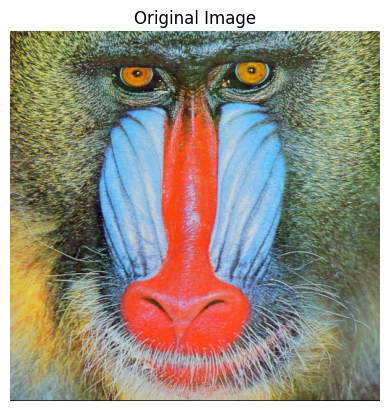

In [2]:
image=cv2.imread('baboon.jpg')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

In [3]:
d={chr(i):i for i in range(256)}
c={i:chr(i) for i in range(256)}

In [4]:
message="This is the secret message"
key="SECRET KEY"

In [5]:
imarr=image.copy().astype(np.uint8)
row,col,bgr,kind=0,0,0,0

length=len(message)

for i in range(length):
    sec_val=d[message[i]]^d[key[kind]]

    print(f"Secret value={message[i]}({d[message[i]]}) xor {key[kind]}({d[key[kind]]} )= {d[message[i]]^d[key[kind]]}")
    for bit in range(8):
        bit_val=(sec_val >> (7-bit) )&1
        orig_val=imarr[row,col,bgr]
        imarr[row,col,bgr]=(orig_val & 0b11111110) | bit_val
        print(f"\tEmbed bit number {7-bit} ({bit_val}) in image[{(row,col,bgr)}], original= {orig_val} new = {imarr[row,col,bgr]} ")
        bgr=(bgr+1)%3
        if bgr==0:
            row+=1
            if row==((image.shape)[0]):
                col+=1
                row=0
    kind=(kind+1)%len(key)

Secret value=T(84) xor S(83 )= 7
	Embed bit number 7 (0) in image[(0, 0, 0)], original= 81 new = 80 
	Embed bit number 6 (0) in image[(0, 0, 1)], original= 148 new = 148 
	Embed bit number 5 (0) in image[(0, 0, 2)], original= 169 new = 168 
	Embed bit number 4 (0) in image[(1, 0, 0)], original= 46 new = 46 
	Embed bit number 3 (0) in image[(1, 0, 1)], original= 125 new = 124 
	Embed bit number 2 (1) in image[(1, 0, 2)], original= 114 new = 115 
	Embed bit number 1 (1) in image[(2, 0, 0)], original= 45 new = 45 
	Embed bit number 0 (1) in image[(2, 0, 1)], original= 79 new = 79 
Secret value=h(104) xor E(69 )= 45
	Embed bit number 7 (0) in image[(2, 0, 2)], original= 92 new = 92 
	Embed bit number 6 (0) in image[(3, 0, 0)], original= 55 new = 54 
	Embed bit number 5 (1) in image[(3, 0, 1)], original= 74 new = 75 
	Embed bit number 4 (0) in image[(3, 0, 2)], original= 71 new = 70 
	Embed bit number 3 (1) in image[(4, 0, 0)], original= 50 new = 51 
	Embed bit number 2 (1) in image[(4, 0, 

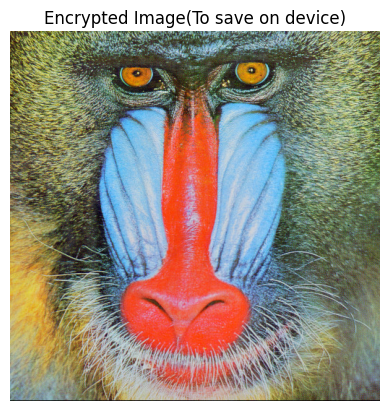

In [6]:
plt.imshow(cv2.cvtColor(imarr,cv2.COLOR_BGR2RGB))
plt.title("Encrypted Image(To save on device)")
plt.axis('off')
plt.show()
yes=cv2.imwrite('baboonSec.png',imarr)

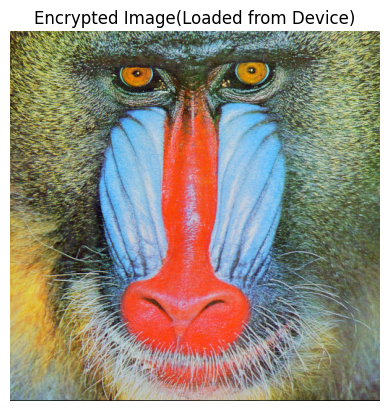

In [7]:
secimage=cv2.imread('baboonSec.png')
plt.imshow(cv2.cvtColor(secimage,cv2.COLOR_BGR2RGB))
plt.title("Encrypted Image(Loaded from Device)")
plt.axis("off")
plt.show()

In [8]:
imarr=secimage.copy().astype(np.uint8)
row,col,bgr,kind=0,0,0,0

msg=""

for i in range(length):
    xored_val=0b00000000
    print(f"\nReading {i+1}th letter: ")
    for bit in range(8):
        sec_val=imarr[row,col,bgr]
        bit_val=sec_val&1
        xored_val= xored_val<<1 | bit_val
        
        print(f"\treceived bit number {7-bit} ({bit_val}) from secret_image[{(row,col,bgr)}], now xored value is: {xored_val} ")
        bgr=(bgr+1)%3
        if bgr==0:
            row+=1
            if row==((image.shape)[0]):
                col+=1
                row=0

    retv=xored_val^d[key[kind]]
    msg+=c[retv]
    print(f"The xored value is {xored_val} , xor back with key[{key[kind]}]({d[key[kind]]}) to get original bit {retv}({c[retv]})")
    kind=(kind+1)%len(key)

   


Reading 1th letter: 
	received bit number 7 (0) from secret_image[(0, 0, 0)], now xored value is: 0 
	received bit number 6 (0) from secret_image[(0, 0, 1)], now xored value is: 0 
	received bit number 5 (0) from secret_image[(0, 0, 2)], now xored value is: 0 
	received bit number 4 (0) from secret_image[(1, 0, 0)], now xored value is: 0 
	received bit number 3 (0) from secret_image[(1, 0, 1)], now xored value is: 0 
	received bit number 2 (1) from secret_image[(1, 0, 2)], now xored value is: 1 
	received bit number 1 (1) from secret_image[(2, 0, 0)], now xored value is: 3 
	received bit number 0 (1) from secret_image[(2, 0, 1)], now xored value is: 7 
The xored value is 7 , xor back with key[S](83) to get original bit 84(T)

Reading 2th letter: 
	received bit number 7 (0) from secret_image[(2, 0, 2)], now xored value is: 0 
	received bit number 6 (0) from secret_image[(3, 0, 0)], now xored value is: 0 
	received bit number 5 (1) from secret_image[(3, 0, 1)], now xored value is: 1 
	r

In [9]:
 print("The message is: ",msg)

The message is:  This is the secret message
